# 3 main models based:
- Kmeans
- Kmedoids
- Agglomerative Clustering (Hierarchical Clustering)

In [18]:
#imports
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import cluster, datasets, mixture
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score

from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN

from sklearn.manifold import TSNE

In [3]:
df=pd.read_csv('../../data/modelers_data_encoded_scaled.csv')
df

,Price,Rating,processor_tier,num_cores,num_threads,ram_memory,primary_storage_is_SSD,primary_storage_capacity,secondary_storage_capacity,gpu_is_dedicated,...,model_thinkpad,model_tuf,model_v14,model_v15,model_victus,model_vivobook,model_vostro,model_yoga,model_zbook,model_zenbook
0,0.343118,0.379310,0.555556,0.181818,0.375,0.125,1.0,0.238095,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.625381,0.724138,0.777778,0.545455,0.625,0.375,1.0,0.492063,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.355625,0.482759,0.555556,0.090909,0.250,0.125,1.0,0.238095,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.997201,1.000000,1.000000,1.000000,1.000,0.000,1.0,1.000000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.326659,0.241379,0.333333,0.272727,0.250,0.125,1.0,0.238095,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,0.301869,0.500000,0.555556,0.181818,0.375,0.375,1.0,0.238095,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
689,0.429821,0.689655,0.555556,0.181818,0.375,0.125,1.0,0.238095,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
690,0.367599,0.551724,0.555556,0.090909,0.250,0.125,1.0,0.238095,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
691,0.493192,0.568966,0.555556,0.363636,0.375,0.125,1.0,0.238095,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
metrics=[
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score
]


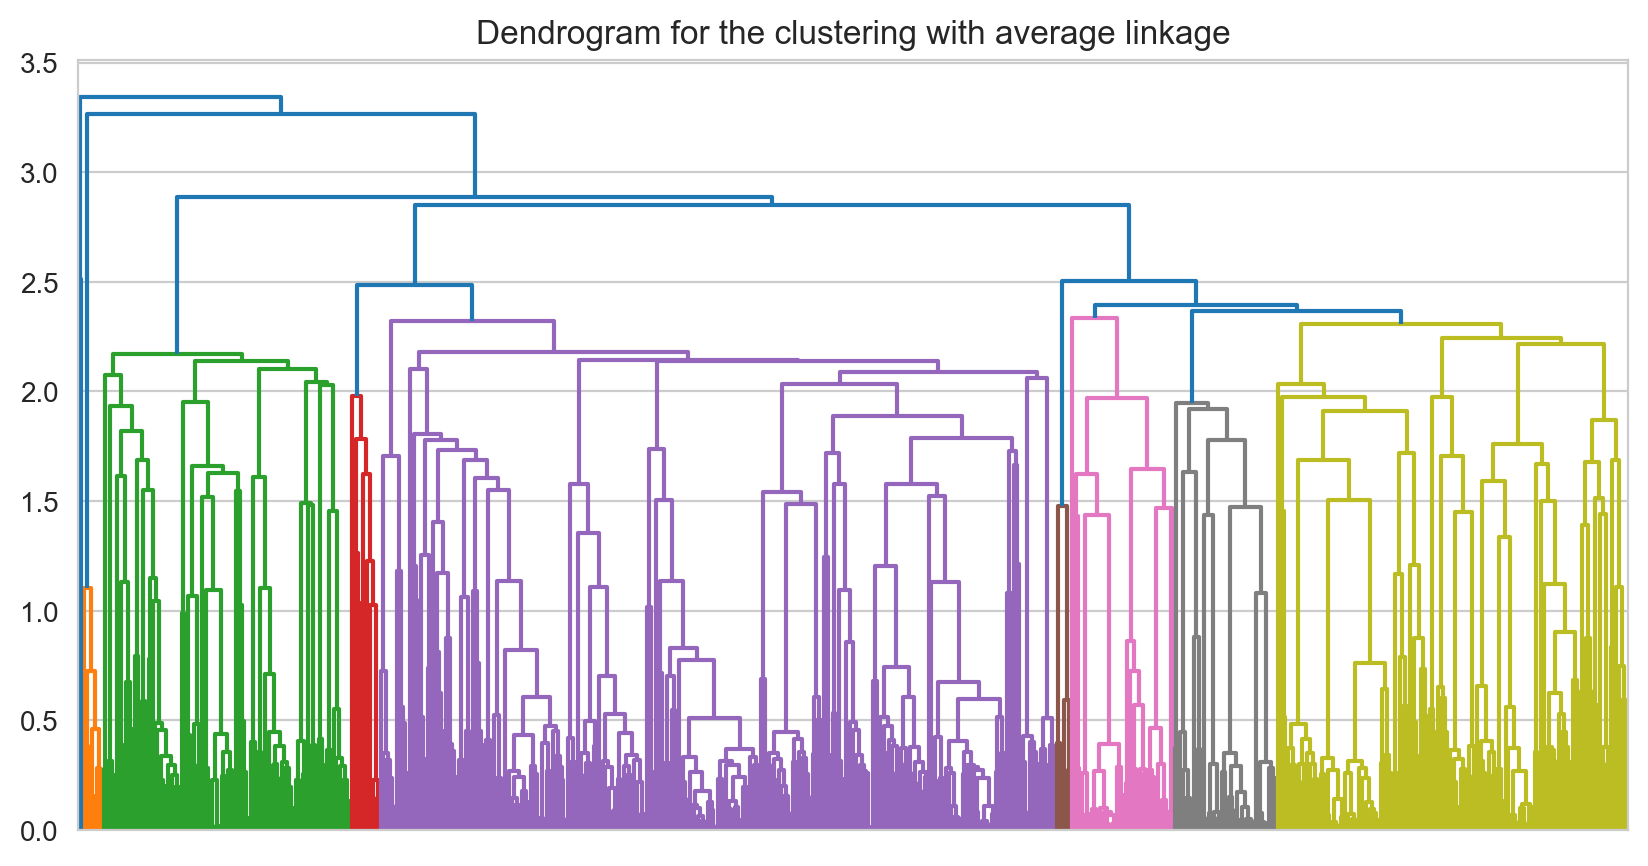

In [8]:
from scipy.cluster import hierarchy

Z=hierarchy.linkage(df, 'average')
plt.figure(figsize=(10, 5), dpi= 200, facecolor='w', edgecolor='k')
hierarchy.dendrogram(Z)
plt.title('Dendrogram for the clustering with average linkage')
plt.xticks([])
plt.show()

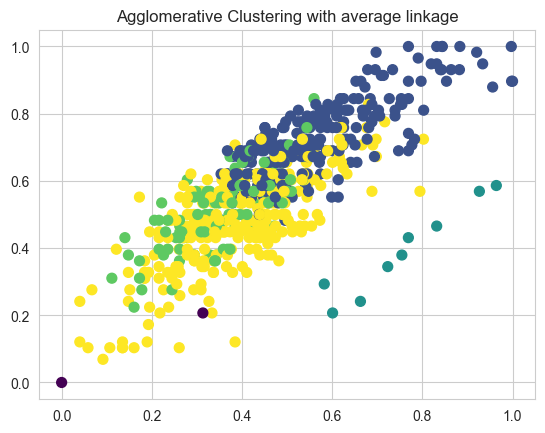

In [9]:
model = AgglomerativeClustering(n_clusters=None, linkage='average', distance_threshold=2.6)
y=model.fit_predict(df)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=y, s=50, cmap='viridis')
plt.title('Agglomerative Clustering with average linkage')
plt.show()

In [10]:
df_before=pd.read_csv('../../data/modelers_data.csv')
df_before['cluster']=y
df_before

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty,cluster
0,949,msi,MSI Modern 15 B7M-072IN Laptop (Ryzen 5 7530U/...,43990,53,amd,ryzen 5,6,12,8,...,0,amd,integrated,False,15.6,1920,1080,windows,1,3
1,584,msi,MSI Prestige 16 A13UCX-250IN Laptop (13th Gen ...,119990,73,intel,core i7,14,20,16,...,0,nvidia,dedicated,False,16.0,2560,1600,windows,2,1
2,937,acer,Acer Aspire 7 A715-75G Gaming Laptop (10th Gen...,45990,59,intel,core i5,4,8,8,...,0,nvidia,dedicated,False,15.6,1920,1080,windows,1,1
3,416,msi,MSI CreatorPro Z16 HX B13VKTO-214IN Laptop (13...,449990,89,intel,core i9,24,32,4,...,0,nvidia,dedicated,False,16.0,2560,1600,windows,2,1
4,538,acer,Acer Aspire 3 Spin 14 NX.KENSI.002 Laptop (Int...,41490,45,intel,core i3,8,8,8,...,0,intel,integrated,False,14.0,1920,1200,windows,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,114,acer,Acer Aspire Lite AL15 Laptop (AMD Ryzen 5 5500...,37990,60,amd,ryzen 5,6,12,16,...,0,amd,integrated,False,15.6,1920,1080,windows,1,3
689,281,hp,HP Victus 15-fb0050AX Gaming Laptop (AMD Ryzen...,59871,71,amd,ryzen 5,6,12,8,...,0,nvidia,dedicated,False,15.6,1920,1080,windows,1,1
690,872,dell,Dell Vostro 15 3510 2023 Laptop (11th Gen Core...,47990,63,intel,core i5,4,8,8,...,0,intel,integrated,False,15.6,1920,1080,windows,1,4
691,447,hp,HP 240 G9 821J4PA Laptop (12th Gen Core i5/ 8G...,74999,64,intel,core i5,10,12,8,...,0,intel,integrated,False,14.0,1366,768,windows,1,4


In [13]:
#how count procesor brand in each cluster
df_before.groupby('cluster')['processor_brand'].value_counts()

cluster  processor_brand
0        other                2
1        intel              175
         amd                 81
2        apple                9
3        amd                110
         intel                1
4        intel              314
         amd                  1
Name: count, dtype: int64

In [ ]:
df_before.groupby('')

In [20]:
# count metrics
def count_metrics(df, y, metrics):
    scores = []
    for metric in metrics:
        print(f'{metric.__name__}: {metric(df, y)}')
        
        
        
count_metrics(df, y, metrics)

silhouette_score: 0.2530817131559984
davies_bouldin_score: 1.2992367184340003
calinski_harabasz_score: 94.45617119801199
